O que vai ser analisado.

Neste relatório, vamos realizar uma análise detalhada dos dados de inscrição do FIES, seguindo um processo estruturado em cinco etapas principais. Nosso objetivo é entender melhor o perfil dos candidatos e as ofertas de cursos disponíveis.

#Passo 1: Estados com Mais Inscritos
Primeiro, vamos identificar os estados brasileiros com o maior número de inscritos no FIES. Esta análise nos ajudará a entender quais regiões estão mais engajadas em buscar financiamento estudantil, o que pode refletir tanto a demanda por educação superior quanto as condições socioeconômicas dos candidatos.

#Passo 2: Distribuição por Sexo
Em seguida, analisaremos a distribuição dos inscritos por sexo, comparando a quantidade de candidatos masculinos e femininos.

#Passo 3:  Origem Escolar dos Inscritos
A seguir, vamos analisar a origem escolar dos candidatos, distinguindo entre aqueles que vieram de escolas públicas e os que estudaram em instituições privadas.

#Passo 4: Estados com Mais Ofertas de Vagas
Além de analisar os inscritos, também verificaremos quais estados oferecem mais vagas através do FIES. Esta etapa nos ajudará a mapear a distribuição das oportunidades de financiamento estudantil pelo país e a entender melhor a relação entre a oferta de vagas e a demanda por financiamento.

#Passo 5: Municípios com Mais Locais de Oferta
Por fim, vamos identificar os municípios com o maior número de locais de oferta para os cursos financiados pelo FIES.

In [12]:
import pandas as pd

file_path = 'relatorio_inscricao_dados_abertos_fies_12021.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='latin1')

uf_counts = data['UF de residência'].value_counts()
print("UF com mais inscritos:", uf_counts.idxmax())

sexo_counts = data['Sexo'].value_counts()
print("Sexo com mais inscritos:", sexo_counts.idxmax())

tipo_escola_counts = data['Tipo de escola no ensino médio'].value_counts()
print("As inscrições teve mais alunos do ensino médio:", tipo_escola_counts.idxmax())

uf_oferta_counts = data['UF do Local de Oferta'].value_counts()
print("Estado com mais ofertas:", uf_oferta_counts.idxmax())

nome_curso_counts = data['Nome do curso'].value_counts()
print("Nome do curso com mais votos:", nome_curso_counts.idxmax())


UF com mais inscritos: SP
Sexo com mais inscritos: F
As inscrições teve mais alunos do ensino médio: SIM
Estado com mais ofertas: SP
Nome do curso com mais votos: MEDICINA


UF de residência com mais inscritos: SP
Sexo com mais inscritos: F
Tipo de escola no ensino médio com mais inscritos: SIM
UF do Local de Oferta com mais inscritos: SP
Turno com mais inscritos: NOTURNO


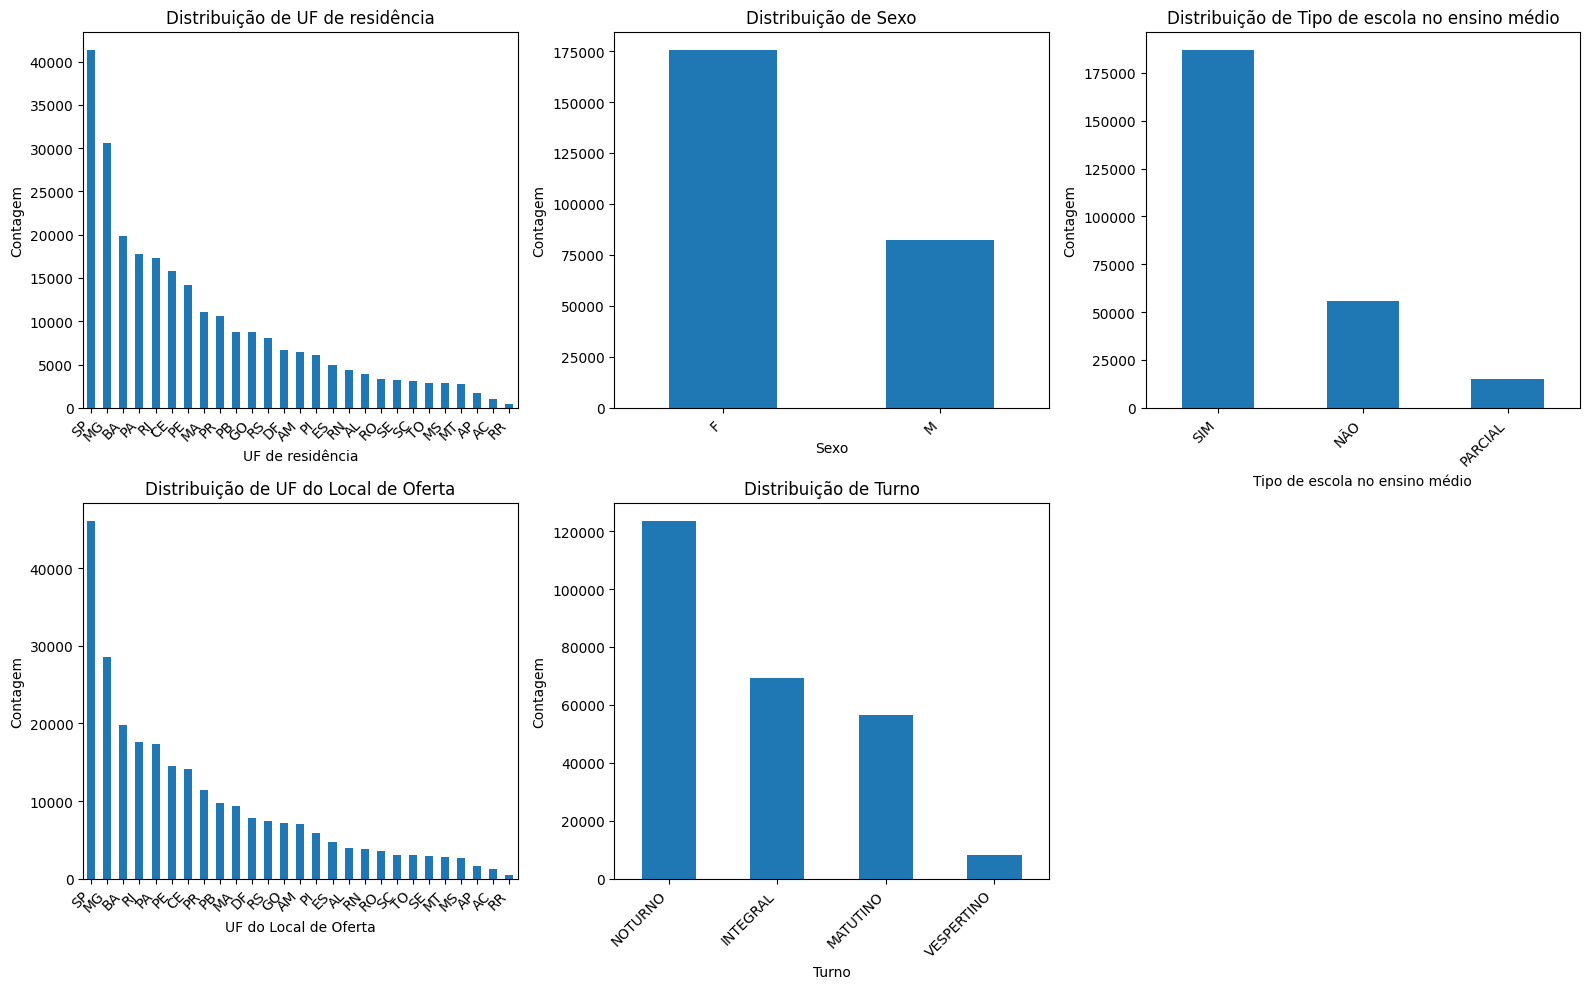

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'relatorio_inscricao_dados_abertos_fies_12021.csv'
df = pd.read_csv(file_path, sep=';', encoding='latin1')

colunas_selecionadas = [
    'UF de residência', 'Sexo', 
    'Tipo de escola no ensino médio', 
    'UF do Local de Oferta', 
    'Turno'
]
df_filtered = df[colunas_selecionadas]

uf_residencia_mais_inscritos = df_filtered['UF de residência'].value_counts().idxmax()
sexo_mais_inscritos = df_filtered['Sexo'].value_counts().idxmax()
tipo_escola_mais_inscritos = df_filtered['Tipo de escola no ensino médio'].value_counts().idxmax()
uf_local_oferta_mais_inscritos = df_filtered['UF do Local de Oferta'].value_counts().idxmax()
turno_com_mais_escolha = df_filtered['Turno'].value_counts().idxmax()

print(f"UF de residência com mais inscritos: {uf_residencia_mais_inscritos}")
print(f"Sexo com mais inscritos: {sexo_mais_inscritos}")
print(f"Tipo de escola no ensino médio com mais inscritos: {tipo_escola_mais_inscritos}")
print(f"UF do Local de Oferta com mais inscritos: {uf_local_oferta_mais_inscritos}")
print(f"Turno com mais inscritos: {turno_com_mais_escolha}")

plt.figure(figsize=(16, 10))

for i, column in enumerate(colunas_selecionadas, 1):
     plt.subplot(2, 3, i)
     df_filtered[column].value_counts().plot(kind='bar')
     plt.title(f'Distribuição de {column}')
     plt.ylabel('Contagem')
     plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


MINHA ANALISE EM PDF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

file_path = 'relatorio_inscricao_dados_abertos_fies_12021.csv'
df = pd.read_csv(file_path, sep=';', encoding='latin1')

colunas_selecionadas = [
    'UF de residência', 'Sexo', 
    'Tipo de escola no ensino médio', 
    'UF do Local de Oferta', 
    'Turno'
]
df_filtered = df[colunas_selecionadas]

uf_residencia_mais_inscritos = df_filtered['UF de residência'].value_counts().idxmax()
sexo_mais_inscritos = df_filtered['Sexo'].value_counts().idxmax()
tipo_escola_mais_inscritos = df_filtered['Tipo de escola no ensino médio'].value_counts().idxmax()
uf_local_oferta_mais_inscritos = df_filtered['UF do Local de Oferta'].value_counts().idxmax()
turno_com_mais_escolha = df_filtered['Turno'].value_counts().idxmax()

plt.figure(figsize=(16, 10))

for i, column in enumerate(colunas_selecionadas, 1):
    plt.subplot(2, 3, i)
    df_filtered[column].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {column}')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('temp_analysis.png')
plt.close()

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="Relatório de Análise de Dados e Inscrição", align="C")
pdf.ln()

pdf.image('temp_analysis.png', x=10, y=pdf.get_y(), w=190)

pdf.output("relatorio_analise_dados.pdf")

print("Relatório gerado com sucesso!")


Relatório gerado com sucesso!


C:\Users\Antonio Ribeiro\AppData\Local\Temp\ipykernel_9432\4201116574.py:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
C:\Users\Antonio Ribeiro\AppData\Local\Temp\ipykernel_9432\4201116574.py:40: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(0, 10, txt="Relatório de Análise de Dados e Inscrição", align="C")
